In [1]:
from scipy import stats

In [2]:
import pandas as pd
import pandas_datareader as web

In [3]:
spy_etf = web.DataReader('SPY','yahoo')

In [4]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,92.968788
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,94.545494
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,94.795784
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,94.862526
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,95.262955


In [5]:
spy_etf.index[-1]

Timestamp('2019-02-13 00:00:00')

In [6]:
start = pd.to_datetime(spy_etf.index[0])
end = pd.to_datetime(spy_etf.index[-1])

In [7]:
aapl = web.DataReader('AAPL','yahoo')

In [8]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.073631
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.386072
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.421322
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.096491
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.059338


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

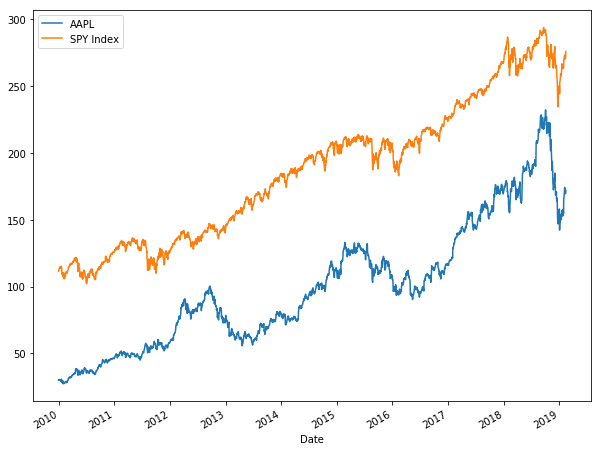

In [12]:
aapl['Close'].plot(label='AAPL',figsize=(10,8))
spy_etf['Close'].plot(label='SPY Index')
plt.legend()

In [17]:
aapl['Cumulative'] = aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cumulative'] = spy_etf['Close']/spy_etf['Close'].iloc[0]

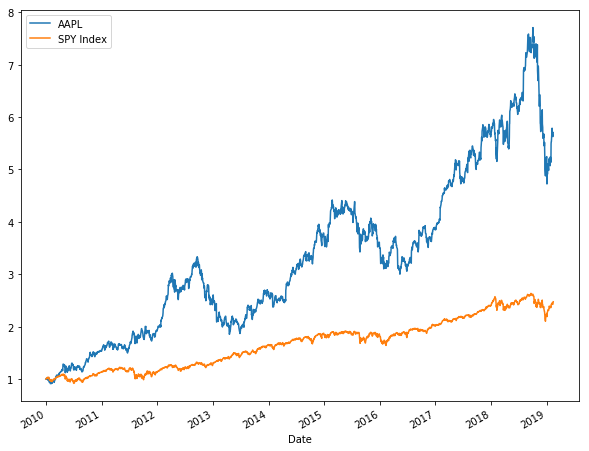

In [18]:
aapl['Cumulative'].plot(label='AAPL',figsize=(10,8))
spy_etf['Cumulative'].plot(label='SPY Index')
plt.legend()
#From this graph you can see that investing in aapl might be better

In [20]:
aapl['Daily Return'] = aapl['Close'].pct_change(1)
spy_etf['Daily Return'] = spy_etf['Close'].pct_change(1)

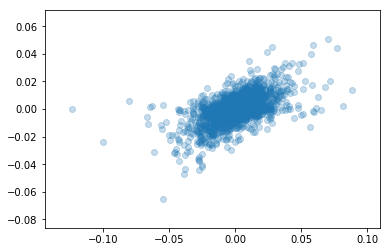

In [22]:
plt.scatter(aapl['Daily Return'],spy_etf['Daily Return'],alpha = 0.25)
#Ther are some correlation

In [23]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily Return'].iloc[1:],spy_etf['Daily Return'].iloc[1:])

In [24]:
beta

0.3381833175729998

In [25]:
alpha

0.00013760794077956638

In [26]:
r_value

0.5862111178894637

In [27]:
import numpy as np

In [42]:
noise = np.random.normal(0,0.001,len(spy_etf['Daily Return'].iloc[1:]))

In [43]:
noise

array([-0.00187051, -0.0002593 ,  0.00110717, ...,  0.00166538,
       -0.00205337, -0.00025957])

In [52]:
fake_stock = spy_etf['Daily Return'].iloc[1:] + noise

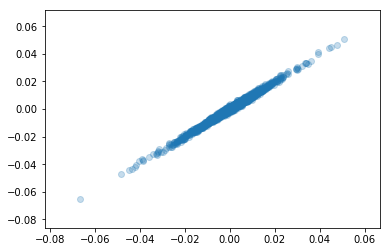

In [54]:
plt.scatter(fake_stock,spy_etf['Daily Return'].iloc[1:],alpha= 0.25)

In [56]:
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,spy_etf['Daily Return'].iloc[1:])

In [57]:
beta

0.9877310286379692

In [59]:
alpha

1.0300269467447792e-05

In [60]:
r_value

0.9946857302035966